In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import shap
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import xgboost as xgb

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
#one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    # vertical_flip = True
)
datagen.fit(x_train)

In [6]:
fine_tuning_model = load_model("/kaggle/input/cifar10_vgg19_finetuned/keras/default/1/cifar10_vgg19_finetuned.keras")

I0000 00:00:1756917853.261200      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [7]:
fine_tuning_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 60,356,960 (230.24 MB)

 Trainable params: 20,032,266 (76.42 MB)

 Non-trainable params: 260,160 (1016.25 KB)

 Optimizer params: 40,064,534 (152.83 MB)

In [9]:
feature_extractor = Model(
    inputs=fine_tuning_model.input,
    outputs=fine_tuning_model.get_layer("global_average_pooling2d").output
)

In [10]:
# Get embeddings
x_train_features = feature_extractor.predict(x_train)
x_test_features = feature_extractor.predict(x_test)

I0000 00:00:1756917889.917568      94 service.cc:148] XLA service 0x78d45c009a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756917889.918346      94 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756917890.058760      94 cuda_dnn.cc:529] Loaded cuDNN version 90300


  27/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step

I0000 00:00:1756917891.537010      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [11]:
print(x_train_features.shape)

(50000, 512)


In [12]:
# Flatten the one-hot encoded labels for XGBoost
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

In [13]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    eval_metric='mlogloss',
    tree_method='gpu_hist',   # use GPU accelerated histogram algorithm
    predictor='gpu_predictor', # use GPU for prediction too
    gpu_id=0                   # set GPU device (0 for first GPU)
)
xgb_model.fit(x_train_features, y_train_flat)

[16:45:13] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
[16:45:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

[16:45:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=10, ...)

In [14]:
# Evaluate XGBoost model
y_pred = xgb_model.predict(x_test_features)
accuracy = accuracy_score(y_test_flat, y_pred)
print(f"XGBoost Accuracy on cifar_10: {accuracy}")

XGBoost Accuracy on cifar_10: 0.845


[16:45:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

[16:45:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



In [18]:
print(classification_report(y_test_flat, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.90      0.91      0.91      1000
           2       0.84      0.80      0.82      1000
           3       0.68      0.69      0.69      1000
           4       0.82      0.85      0.83      1000
           5       0.76      0.74      0.75      1000
           6       0.87      0.88      0.88      1000
           7       0.88      0.87      0.88      1000
           8       0.93      0.93      0.93      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Interpretation

In [42]:
idx = 4   # or any index
img = x_test[idx:idx+1]   # keep batch dimension
true_label = y_test[idx]

In [43]:
embedding = feature_extractor.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [44]:
pred = xgb_model.predict(embedding)[0]
print(f"True Label: {true_label}, Predicted Label: {pred}")

True Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted Label: 6


In [45]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(embedding)

# Get top contributing embedding dimensions
abs_shap = np.abs(shap_values).flatten()
top_dims = abs_shap.argsort()[-5:][::-1]  # top 5

print("Top embedding dimensions influencing prediction:", top_dims)

Top embedding dimensions influencing prediction: [5115  952 3501 3332 4353]


In [46]:
def grad_cam(img_array, model, layer_name="block5_conv4"):
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]   # gradients wrt conv outputs
    weights = tf.reduce_mean(grads, axis=(0, 1))   # channel-wise mean

    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)

    # Convert to numpy and normalize
    cam = cam.numpy()
    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-8)

    return cam

heatmap = grad_cam(img, fine_tuning_model, "block5_conv4")
heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))

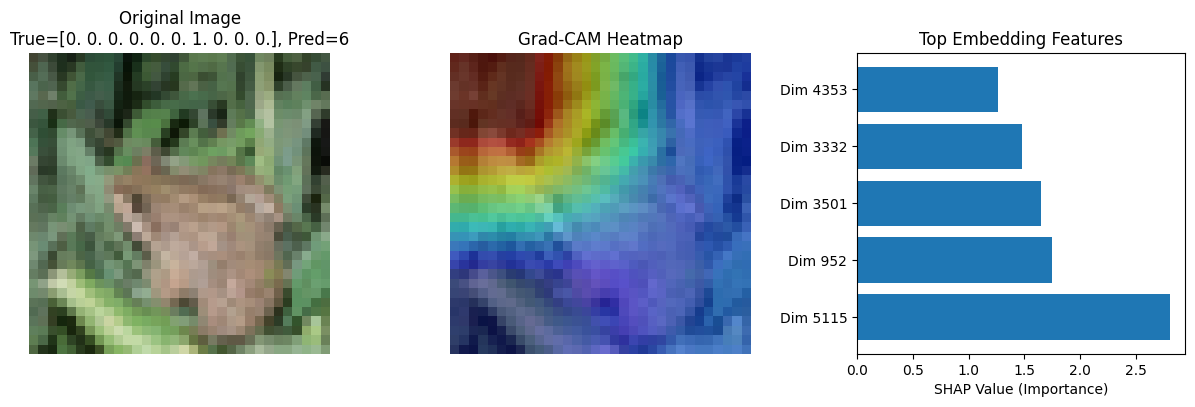

In [47]:
plt.figure(figsize=(12,4))

# Original image
plt.subplot(1,3,1)
plt.imshow(img[0])
plt.title(f"Original Image\nTrue={true_label}, Pred={pred}")
plt.axis("off")

# Grad-CAM heatmap
plt.subplot(1,3,2)
plt.imshow(img[0])
plt.imshow(heatmap, cmap="jet", alpha=0.5)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

# SHAP embedding importance (bar plot for top dims)
plt.subplot(1,3,3)
plt.barh(range(len(top_dims)), abs_shap[top_dims])
plt.yticks(range(len(top_dims)), [f"Dim {d}" for d in top_dims])
plt.xlabel("SHAP Value (Importance)")
plt.title("Top Embedding Features")

plt.tight_layout()
plt.show()

# Other Models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dictionary of classifiers to test
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, n_jobs=-1),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Train & evaluate each classifier
for name, clf in classifiers.items():
    print("="*50)
    print(f"Training {name}...")
    clf.fit(x_train_features, y_train_flat)
    y_pred = clf.predict(x_test_features)
    acc = accuracy_score(y_test_flat, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test_flat, y_pred))

Training Logistic Regression...
Random Forest Accuracy: 0.8451
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       0.90      0.92      0.91      1000
           2       0.83      0.80      0.82      1000
           3       0.69      0.69      0.69      1000
           4       0.82      0.84      0.83      1000
           5       0.77      0.74      0.76      1000
           6       0.86      0.88      0.87      1000
           7       0.88      0.87      0.87      1000
           8       0.93      0.93      0.93      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

Training SVM (RBF Kernel)...
SVM (RBF Kernel) Accuracy: 0.8477
Classification Report for SVM (RBF Kernel):

              precision    r